In [23]:
%run src/columns.py
import pickle

In [16]:
from src.data_cleaning import *

In [17]:
csv_file_names = ('LoanStats3a_securev1.csv', 'LoanStats3b_securev1.csv', 'LoanStats3c_securev1.csv', 'LoanStats3d_securev1.csv',
                  'LoanStats_securev1_2016Q1.csv', 'LoanStats_securev1_2016Q2.csv', 'LoanStats_securev1_2016Q3.csv','LoanStats_securev1_2016Q4.csv', 
                  'LoanStats_securev1_2017Q1.csv', 'LoanStats_securev1_2017Q2.csv', 'LoanStats_securev1_2017Q3.csv', 'LoanStats_securev1_2017Q4.csv',
                  'LoanStats_securev1_2018Q1.csv', 'LoanStats_securev1_2018Q2.csv', 'LoanStats_securev1_2018Q3.csv', 'LoanStats_securev1_2018Q4.csv',
                  'LoanStats_securev1_2019Q1.csv', 'LoanStats_securev1_2019Q2.csv', 'LoanStats_securev1_2019Q3.csv', 'LoanStats_securev1_2019Q4.csv',
                  'LoanStats_securev1_2020Q1.csv', 'LoanStats_securev1_2020Q2.csv')

df_raw = load_loan_data_from_local_machine(csv_file_names, columns_to_use)

In [24]:
loan_amounts = dict(zip(df_raw['id'], df_raw['loan_amnt']))
with open('data/loan_amounts.pickle', 'wb') as handle:
    pickle.dump(loan_amounts, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
def clean_and_prepare_raw_data_for_EDA(df):
    '''
    Take in the raw dataframe containing all loan data and run through all functions required to prepare it for model training.

    Args:
        df (dataframe): Dataframe of loans.

    Returns:
        Dataframe: Returns the loan dataframe after all the data cleaning and feature engineering functions have been applied.

    TODO:
        This function currently relies on functions stored in feature-engineering.py. This is acceptable for working in the
        Jupyter notebook I have but I need to change the organization of my code later on.
    '''
    df = drop_loan_status(df)
    df = drop_joint_applicant_loans(df)
    df = fix_rate_cols(df)
    df.dropna(subset=['issue_d'], inplace=True)
    df = fix_date_cols(df)
    df.sort_values(by='issue_d', inplace=True)
    df = exclude_loans_before_2010(df)
    df = clean_loan_term_col(df)
    df = only_include_36_month_loans(df)
    df = clean_employment_length(df)
    # I doubt we need missing data boolean columns for tree models.\
    #df = add_issue_date_and_month(df) # Ditch this?
    #df = add_supplemental_rate_data(df)
    #df = create_rate_difference_cols(df)
    df = create_months_since_earliest_cl_col(df)
    #df = create_loan_life_months_col(df)
    df = change_data_types(df)
    #df = create_dummy_cols(df)
    df = drop_unnecessary_cols(df)
    df.set_index('id', inplace=True)

    return df

In [5]:
df_EDA = clean_and_prepare_raw_data_for_EDA(df_raw)
df_EDA.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_earliest_cr
id,,,,,,,,,,,,,,,,,,,,,
477567,10000,14.61,344.760010,D,5.0,MORTGAGE,62400.0,Not Verified,2010-01-01,educational,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,162
477585,15000,16.00,527.359985,D,7.0,RENT,96000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,134
474990,20000,11.83,662.679993,B,5.0,MORTGAGE,105000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,180
477531,15000,15.31,522.229980,D,10.0,MORTGAGE,90000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,183
477639,5600,13.22,189.289993,C,8.0,RENT,75797.0,Not Verified,2010-01-01,other,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,150


In [6]:
df_EDA.to_pickle('data/df_EDA.pkl.bz2', compression='bz2')

In [24]:
df_raw

NameError: name 'df_raw' is not defined

In [1]:
import pandas as pd

#payment_cols = ('LOAN_ID', 'IssuedDate', 'RECEIVED_D', 'RECEIVED_AMT_INVESTORS', 'PBAL_END_PERIOD_INVESTORS')
#payments = pd.read_csv('data/PMTHIST_INVESTOR_202006.csv', usecols=payment_cols, low_memory=False, nrows=None)
payments = pd.read_pickle('data/df_payments_all_202008.pkl.bz2', compression='bz2')
payments.head()

,LOAN_ID,RECEIVED_D,RECEIVED_AMT_INVESTORS,PBAL_END_PERIOD_INVESTORS,IssuedDate
0,54734,SEP2009,632.771017,18636.409300,AUG2009
1,54734,OCT2009,632.771017,18188.363925,AUG2009
2,54734,NOV2009,632.771017,17735.877487,AUG2009
3,54734,DEC2009,632.771017,17278.905966,AUG2009
4,54734,JAN2010,632.771017,16817.404904,AUG2009


In [2]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61820100 entries, 0 to 28703915
Data columns (total 5 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   LOAN_ID                    int64  
 1   RECEIVED_D                 object 
 2   RECEIVED_AMT_INVESTORS     float64
 3   PBAL_END_PERIOD_INVESTORS  float64
 4   IssuedDate                 object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ GB


In [3]:
def get_cleaned_payment_history_data(raw_payments_df):
    '''
    Function to clean the raw dataframe containing loan payments. Converts columns that are dates, integers, or floats to their
    proper data type. Creates new column to calculate how many months into the loan each payment was made. A payment made in April 2019
    for a loan issued in January 2019 would have a 'mths_since_issue' value of 3.

    At the end set the index to be a multi-level index of date, loan id and sort the index.

    Args:
        raw_payments_df (dataframe): The dataframe containing the raw payments data for loans.

    Returns:
        DataFrame: Returns the payments dataframe with a multi-level index of payment date and loan ID. 

    TODO:
        Figure out where in here to use .loc[] to avoid warnings in my Jupyter notebook.
    '''
    df = raw_payments_df
    df['RECEIVED_D'] = convert_payment_date(df['RECEIVED_D'])
    df['IssuedDate'] = convert_payment_date(df['IssuedDate'])
    # Had to add max 1. EDIT LATER
    df['mths_since_issue'] = 12*(df['RECEIVED_D'].dt.year - df['IssuedDate'].dt.year) + (df['RECEIVED_D'].dt.month - df['IssuedDate'].dt.month)
    df = df.dropna()
    #df['mths_since_issue'] = np.where(df['mths_since_issue'] == 0, 1, df['mths_since_issue'])
    df['mths_since_issue'] = df['mths_since_issue'].astype('uint8')
    #df.drop(columns='IssuedDate', inplace=True)
    df['RECEIVED_AMT_INVESTORS'] = df['RECEIVED_AMT_INVESTORS'].astype('float32')
    df['PBAL_END_PERIOD_INVESTORS'] = df['PBAL_END_PERIOD_INVESTORS'].astype('float32')
    return df

In [4]:
def convert_payment_date(col_date):
    '''
    Function to convert the date column in the payments dataframe to a datetime data type. The date initially comes in as a string,
    such as 'SEP2009'. 

    Args:
        col_date (dataframe column): The columns that contains the date to be converted. 

    Returns:
        DataFrame: Returns a dataframe column converted to a datetime data type.
    '''
    # Format %b%Y is used because the date comes as the first 3 letters of the month followed by a 4 digit year. 
    return pd.to_datetime(col_date, format = '%b%Y')

In [6]:
import numpy as np
df_payments_clean = get_cleaned_payment_history_data(payments)

<ipython-input-3-10183a277933>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mths_since_issue'] = df['mths_since_issue'].astype('uint8')
<ipython-input-3-10183a277933>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RECEIVED_AMT_INVESTORS'] = df['RECEIVED_AMT_INVESTORS'].astype('float32')
<ipython-input-3-10183a277933>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [7]:
df_payments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59755477 entries, 0 to 28703915
Data columns (total 6 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   LOAN_ID                    int64         
 1   RECEIVED_D                 datetime64[ns]
 2   RECEIVED_AMT_INVESTORS     float32       
 3   PBAL_END_PERIOD_INVESTORS  float32       
 4   IssuedDate                 datetime64[ns]
 5   mths_since_issue           uint8         
dtypes: datetime64[ns](2), float32(2), int64(1), uint8(1)
memory usage: 2.3 GB


In [8]:
mask = df_payments_clean['LOAN_ID'] == 73582
df_payments_clean.loc[mask, :]

,LOAN_ID,RECEIVED_D,RECEIVED_AMT_INVESTORS,PBAL_END_PERIOD_INVESTORS,IssuedDate,mths_since_issue
1789,73582,2007-07-01,7.289357,219.637436,2007-06-01,1
1790,73582,2007-08-01,7.289357,214.228943,2007-06-01,2
1791,73582,2007-09-01,7.289357,208.774124,2007-06-01,3
1792,73582,2007-10-01,7.289357,203.272614,2007-06-01,4
1793,73582,2007-11-01,7.289357,197.723984,2007-06-01,5
1794,73582,2007-12-01,7.289357,192.127838,2007-06-01,6
1795,73582,2008-01-01,7.289357,186.483765,2007-06-01,7
1796,73582,2008-03-01,188.112854,0.000000,2007-06-01,9


In [9]:
def set_and_sort_indices(payments_df):
    '''
    Function to set the index of the payments dataframe to be the payment date and loan ID.
    This way we can easily extract payments in a certain month and/or for a certain loan.
    Sort the index after it's set.

    Args:
        payments_df (dataframe): The dataframe containing payments data for loans.

    Returns:
        DataFrame: Returns the payments dataframe with a multi-level index of payment date and loan ID. 
    '''
    df = payments_df.set_index(['RECEIVED_D', 'LOAN_ID'])
    df = df.sort_index()
    return df

In [10]:
df_payments = set_and_sort_indices(df_payments_clean)

In [14]:
df_payments.to_pickle('data/df_payments_cleaned_all_old.pkl.bz2', compression='bz2')

In [12]:
def get_one_loan_payment_data(df_payments, loan_id):
    '''
    Function to extract payments made by a single loan ID. 

    Args:
        payments_training_loans (dataframe): The dataframe containing all loan payments data for our training loans.
            Only training loans are relevant since ROI needs to be calculated as our label to use in model training.
        loan_id (int): The loan ID that we want to get payments for.

    Returns:
        DataFrame: Returns a dataframe containing payment history for a single loan.

    Todo: Add in description of the format the payments_training_loans dataframe should be in.
    '''
    try:
        # Loan ID must be passed in as a list to ensure we get a dataframe back and not a series.
        # Otherwise a series is returned when we have a loan where only 1 payment has been made.
        return df_payments.loc[pd.IndexSlice[:, loan_id], ['RECEIVED_AMT_INVESTORS', 'mths_since_issue']]
    except:
        # Need to return an empty dataframe if no payments were found for the given loan_id.
        return pd.DataFrame()

In [13]:
get_one_loan_payment_data(df_payments, 88082393)

,,RECEIVED_AMT_INVESTORS,mths_since_issue
RECEIVED_D,LOAN_ID,,
2016-08-01,88082393,15020.290039,0


In [38]:
df_payments.to_pickle('data/df_payments_cleaned_all.pkl.bz2')

In [22]:
#set(training_loan_ids)
import pickle 

with open('data/training_loan_ids.pickle', 'wb') as handle:
    pickle.dump(set(training_loan_ids), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
import pandas as pd
df = pd.read_pickle('data/df_EDA.pkl.bz2', compression='bz2')
df.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_earliest_cr
id,,,,,,,,,,,,,,,,,,,,,
477567,10000,14.61,344.760010,D,5.0,MORTGAGE,62400.0,Not Verified,2010-01-01,educational,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,162
477585,15000,16.00,527.359985,D,7.0,RENT,96000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,134
474990,20000,11.83,662.679993,B,5.0,MORTGAGE,105000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,180
477531,15000,15.31,522.229980,D,10.0,MORTGAGE,90000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,183
477639,5600,13.22,189.289993,C,8.0,RENT,75797.0,Not Verified,2010-01-01,other,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,150


In [17]:
import numpy as np
from numpy_financial import irr
# Need to figure out how to get loan balances.
initial_loan_balance = 500
one_loan = df_payments.loc[pd.IndexSlice[:, 55742], ['RECEIVED_AMT_INVESTORS', 'mths_since_issue']]

In [19]:
max_months = one_loan['mths_since_issue'].max()
max_months

37

In [20]:
payments = np.zeros(max_months+1)
payments[0] = -initial_loan_balance
payments

array([-500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.])

In [21]:
for payment, month in zip(one_loan['RECEIVED_AMT_INVESTORS'], one_loan['mths_since_issue']):
    payments[month] += payment
payments

array([-500.        ,    0.        ,   43.87065506,   21.93532753,
          0.        ,   43.87065506,    0.        ,   43.87065506,
         21.93532753,    0.        ,   43.87065506,   21.93532753,
         21.93532753,    0.        ,   43.87065506,    0.        ,
         21.93532753,   43.87065506,    0.        ,   43.87065506,
          0.        ,   21.93532753,   21.93532753,   43.87065506,
          0.        ,   21.93532753,   43.87065506,    0.        ,
         43.87065506,    0.        ,   21.93532753,   43.87065506,
          0.        ,   21.93532753,   21.93532753,   21.93532753,
         21.93532753,   21.96031761])

In [17]:
sum(one_loan['RECEIVED_AMT_INVESTORS'])

789.6967811584473

In [18]:
irr_monthly = irr(payments)
irr_monthly

0.026230718896468552

In [30]:
def convert_monthly_return_to_annual(irr):
    return (1 + irr)**12 - 1    

In [20]:
convert_monthly_return_to_annual(.02)

0.2682417945625455

In [21]:
df = pd.read_pickle('df_EDA.pkl.bz2', compression='bz2')

In [22]:
df.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_earliest_cr
id,,,,,,,,,,,,,,,,,,,,,
477567,10000.0,14.61,344.760010,D,5.0,MORTGAGE,62400.0,Not Verified,2010-01-01,educational,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,162
477585,15000.0,16.00,527.359985,D,7.0,RENT,96000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,134
474990,20000.0,11.83,662.679993,B,5.0,MORTGAGE,105000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,180
477531,15000.0,15.31,522.229980,D,10.0,MORTGAGE,90000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,183
477639,5600.0,13.22,189.289993,C,8.0,RENT,75797.0,Not Verified,2010-01-01,other,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,150


In [4]:
loan_amounts = dict(zip(df.index, df['loan_amnt']))

for k, v in loan_amounts.items():
    loan_amounts[k] = int(v)
# loan_amounts

In [5]:
import pickle 

with open('data/loan_amounts.pickle', 'wb') as handle:
    pickle.dump(loan_amounts, handle, protocol=4)

In [25]:
import pickle 

with open('data/loan_amounts.pickle', 'rb') as handle:
    loan_amounts = pickle.load(handle)

In [26]:
loan_id = 477797

loan_payments = get_one_loan_payment_data(df_payments, loan_id)
starting_loan_balance = loan_amounts[loan_id]

In [27]:
loan_amounts[loan_id]

24250

In [28]:
max_months = loan_payments['mths_since_issue'].max()
payments = np.zeros(max_months+1)
payments[0] = -starting_loan_balance
for payment, month in zip(loan_payments['RECEIVED_AMT_INVESTORS'], loan_payments['mths_since_issue']):
    payments[month] += payment
payments

array([-24250.        ,      0.        ,    813.92834473,    963.61907959,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    813.92834473,    813.92834473,    813.92834473,
          813.92834473,    611.1373291 ])

In [39]:
irr_monthly = irr(payments)
convert_monthly_return_to_annual(irr_monthly)

0.1273658594932785

In [32]:
loan_id = 477797
starting_loan_balance = loan_amounts[loan_id]
loan_payments = get_one_loan_payment_data(df_payments, loan_id)
max_months = loan_payments['mths_since_issue'].max()
payments = np.zeros(max_months+1)
payments[0] = -starting_loan_balance
for payment, month in zip(loan_payments['RECEIVED_AMT_INVESTORS'], loan_payments['mths_since_issue']):
    payments[month] += payment
irr_monthly = irr(payments)
irr_annual = convert_monthly_return_to_annual(irr_monthly)
100 * irr_annual

12.73658594932785

In [33]:
def get_roi_for_loan_id(loan_id):
    starting_loan_balance = loan_amounts[loan_id]
    loan_payments = get_one_loan_payment_data(df_payments, loan_id)
    if len(loan_payments) == 0:
        return -100
    max_months = loan_payments['mths_since_issue'].max()
    payments = np.zeros(max_months+1)
    payments[0] = -starting_loan_balance
    for payment, month in zip(loan_payments['RECEIVED_AMT_INVESTORS'], loan_payments['mths_since_issue']):
        payments[month] += payment
    irr_monthly = irr(payments)
    irr_annual = convert_monthly_return_to_annual(irr_monthly)
    return 100 * irr_annual

In [34]:
loan_ids = df.index[:10000]

NameError: name 'df' is not defined

In [35]:
results = {loan_id:get_roi_for_loan_id(loan_id) for loan_id in loan_ids}
#results

NameError: name 'loan_ids' is not defined

In [36]:
with open('data/roi_training_loans.pickle', 'rb') as handle:
    loan_rois = pickle.load(handle)

In [45]:
len(df.index)

1886735

In [15]:
df = pd.read_pickle('data/df_EDA.pkl.bz2', compression='bz2')

In [6]:
import datetime
cutoff_date = datetime.datetime(year=2017, month=7, day=1)

In [7]:
mask = df['issue_d'] <= cutoff_date
training_loan_ids = df.loc[mask].index

In [9]:
with open('data/training_loan_ids.pickle', 'wb') as handle:
    pickle.dump(training_loan_ids, handle, protocol=4)

In [50]:
get_roi_for_loan_id(860289)

9.020687774922976

In [45]:
loan_ids = loan_rois.keys()

In [ ]:
results = {loan_id:get_roi_for_loan_id(loan_id) for loan_id in loan_ids}

with open('data/roi_training_loans.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print('All Done!')
print('Give your computer a rest!')

# EDA

Let's do some EDA now that we've calculated ROI.

In [1]:
import pickle

with open('data/roi_training_loans.pickle', 'rb') as handle:
    loan_rois = pickle.load(handle)
len(loan_rois)

1043955

1026916

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('fivethirtyeight')

In [17]:
df = pd.read_pickle('df_EDA.pkl.bz2', compression='bz2')
df.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_earliest_cr
id,,,,,,,,,,,,,,,,,,,,,
477567,10000.0,14.61,344.760010,D,5.0,MORTGAGE,62400.0,Not Verified,2010-01-01,educational,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,162
477585,15000.0,16.00,527.359985,D,7.0,RENT,96000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,134
474990,20000.0,11.83,662.679993,B,5.0,MORTGAGE,105000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,180
477531,15000.0,15.31,522.229980,D,10.0,MORTGAGE,90000.0,Not Verified,2010-01-01,debt_consolidation,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,183
477639,5600.0,13.22,189.289993,C,8.0,RENT,75797.0,Not Verified,2010-01-01,other,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,150


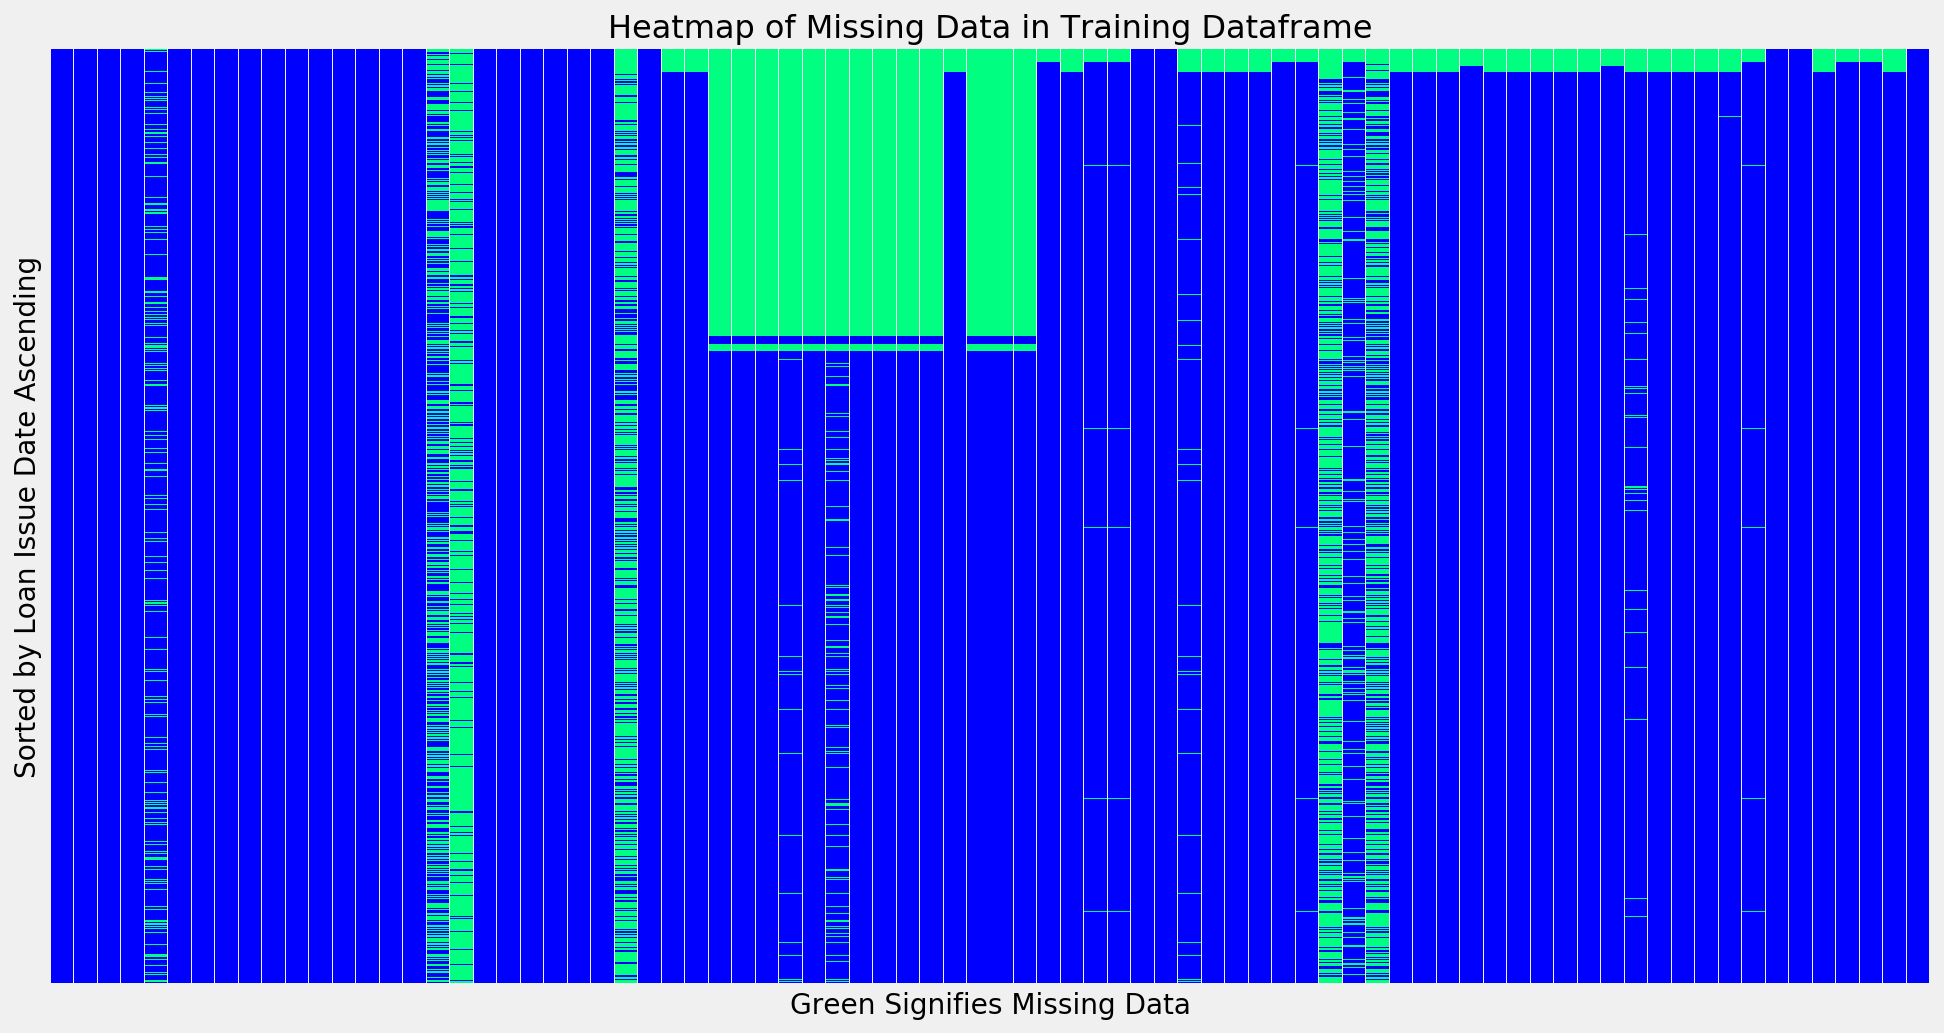

In [18]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(df.isnull(), yticklabels=False, xticklabels=False, cbar=False, cmap='winter')
ax.set_xlabel('Green Signifies Missing Data', fontsize=14)
ax.set_ylabel('Sorted by Loan Issue Date Ascending', fontsize=14)
ax.set_title('Heatmap of Missing Data in Training Dataframe', fontsize=16);

In [19]:
def get_percent_missing(series):
    num_missing = series.isnull()
    total = len(series)
    return 100*(num_missing/total)

df_missing = pd.DataFrame(round(df.isnull().sum()/len(df) * 100,2))
df_missing = df_missing.rename(columns={0: 'PctMissing'})
df_missing.sort_values(by='PctMissing', ascending=False, inplace=True)

dfmissing[df_missing['PctMissing'] > 0].head(20)

NameError: name 'dfmissing' is not defined